In [148]:
# Import the modules
import pandas as pd
from pathlib import Path
import hvplot.pandas

# Import the K-means algorithm
from sklearn.cluster import KMeans
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score


## Split the Data into Training and Testing Sets

### Step 1: Read the `neighborhood.csv` data into a Pandas DataFrame.

In [149]:
# Read in the CSV file as a Pandas DataFrame
home_prediction = pd.read_csv(Path("neighborhoods.csv"))

# Review the DataFrame
home_prediction.head()


,RegionID,Neighborhood,State,City,Metro,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,118208,South Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,506642.0,502524.0,497331.0,493370.0,...,671146.0,674242.0,677691.0,678758.0,679208.0,677960.0,677351.0,674928.0,667856.0,658327.0
1,268496,Southeast Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,425679.0,422895.0,418987.0,416306.0,...,569715.0,572643.0,576533.0,579171.0,580886.0,580609.0,580315.0,578471.0,573768.0,566632.0
2,273565,East San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,793552.0,786114.0,777802.0,770834.0,...,978476.0,979334.0,974156.0,965418.0,955752.0,946936.0,941145.0,937052.0,930206.0,919784.0
3,273088,Bullard,CA,Fresno,"Fresno, CA",Fresno County,323923.5,326059.5,328003.5,329031.5,...,456946.5,461154.0,462796.0,461944.0,459337.5,456939.5,454922.5,452773.0,449136.5,446411.0
4,276652,West San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,1457490.0,1434139.0,1408370.0,1385831.0,...,1803243.0,1804447.0,1792097.0,1773101.0,1753691.0,1741227.0,1739328.0,1741457.0,1735428.0,1714749.0


In [150]:
# Remove the RegionID and State columns
home_prediction_df = home_prediction.drop(columns = ['RegionID','Neighborhood','State','City','Metro'])
home_prediction_df.head(5)


,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28
0,Los Angeles County,506642.0,502524.0,497331.0,493370.0,490663.0,488695.0,490276.0,496185.0,504832.0,...,671146.0,674242.0,677691.0,678758.0,679208.0,677960.0,677351.0,674928.0,667856.0,658327.0
1,Los Angeles County,425679.0,422895.0,418987.0,416306.0,414891.0,413916.0,415614.0,420681.0,427909.0,...,569715.0,572643.0,576533.0,579171.0,580886.0,580609.0,580315.0,578471.0,573768.0,566632.0
2,Santa Clara County,793552.0,786114.0,777802.0,770834.0,765129.0,759231.0,755923.0,754748.0,756644.0,...,978476.0,979334.0,974156.0,965418.0,955752.0,946936.0,941145.0,937052.0,930206.0,919784.0
3,Fresno County,323923.5,326059.5,328003.5,329031.5,329221.5,329165.0,328951.5,329092.5,329535.0,...,456946.5,461154.0,462796.0,461944.0,459337.5,456939.5,454922.5,452773.0,449136.5,446411.0
4,Santa Clara County,1457490.0,1434139.0,1408370.0,1385831.0,1368964.0,1353640.0,1344605.0,1338637.0,1338512.0,...,1803243.0,1804447.0,1792097.0,1773101.0,1753691.0,1741227.0,1739328.0,1741457.0,1735428.0,1714749.0


## Prepare the Data to Fit the Linear Regression Model

In [151]:
# To test the score of the model, let's for instance predict 2023 Febraury's home price starting from 2022_02_28
# We  will need to drop all prices from 2022_03_31 to 2023_02_28 to allow the model predict February 2023
# And then compare the predicted value with the actual value we already know, to ascertain the model's predictability

x = home_prediction_df.drop(columns=[
     'County','2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28'])



In [152]:
# # Create the X set by using the `reshape` function to format the historical prices data as a single column array.
# x = drop_one_yr_prices["ads"].values.reshape(-1, 1)

# # Display sample data
# x[:5]


In [153]:
# Create an array for the dependent variable y with the 2023_02_28 data
y = home_prediction_df['2023-02-28']


In [154]:
# Split the Dataset into Train Set and Test Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [155]:
# View the shapes of splitter data.

#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1557, 38)
X_test: (519, 38)
Y_train: (1557,)
Y_test: (519,)


## Build and Train the Linear Regression Model

In [156]:
# From the sklearn module, use the LinearRegression() to create a linear regression object
regr = linear_model.LinearRegression()

# Fit the model, taking the independent and dependent values as parameters
# filling the regression object with data that describes the relationship, and ready to make the predictions:
regr.fit(x_train, y_train)


LinearRegression()

In [157]:
# Display the slopes
print(f"Model's slope: {regr.coef_}")


Model's slope: [-3.05602646e+00  4.99000221e+00 -7.25367080e-01 -5.99876443e+00
  9.43076304e+00 -5.62504318e+00  1.20526437e+00  3.66351600e+00
 -1.28826050e+01  1.08402466e+01  9.68781283e-01 -7.33152461e+00
  5.32185359e+00  3.59836981e+00 -1.18060761e+01  1.00380271e+01
  4.27742416e+00 -2.08526425e+01  1.71110473e+01  1.01959111e+01
 -3.02990983e+01  2.08375287e+01  3.70310165e+00 -1.94250499e+01
  1.78904508e+01  1.86123527e-02 -1.72769062e+01  1.78015679e+01
 -5.83052592e+00 -4.26847291e+00  6.13387863e+00  8.83018693e-01
 -1.22240820e+01  1.10733585e+01 -5.30587862e-01 -2.23178373e+00
 -2.99383425e+00  4.30560879e+00]


In [158]:
# Display the y-intercept
print(f"Model's y-intercept: {regr.intercept_}")

Model's y-intercept: 14426.618805357488


In [159]:
# Display the model's best fit line formula
print(f"Model's formula: y = {regr.intercept_} + {regr.coef_[0]}X")


Model's formula: y = 14426.618805357488 + -3.056026462332441X


In [160]:
# Make predictions using the X set
predicted2023_02_28 = regr.predict(x_test)
predicted2023_02_28


array([ 485855.5758783 ,  544624.8232696 ,  777134.70482927,
        369665.36347732,  629471.10441102,  694523.93279194,
       2072917.22089524,  533700.53764683,  785725.80645794,
        857856.00911926,  476066.89470862, 2708212.74687254,
       3263517.50078786,  355351.97923937, 1075758.26671995,
        461668.15685798, 1002672.98917088,  569399.80121682,
        354250.34804869,  598817.19570598,  903235.59071238,
       1213389.49114379, 1369212.73666125,  725477.55052938,
       1179097.8493959 , 1246792.11856775,  801150.38431246,
        375783.48018165, 1527606.43449962,  479549.66054054,
       1224630.62158413,  339325.88654794, 1352729.2984256 ,
        230914.52946912, 1973241.79620914,  484786.74371557,
        473611.29710846,  725830.54565172, 1535324.46085369,
       1183149.34605816, 1432762.1511878 ,  898379.76783422,
        773984.07728845,  731094.85100182, 1228553.87232222,
        605053.45471913,  370828.50648841,  810468.26592789,
       1334159.43457106,

## Plot the Results

Text(0.5, 1.0, 'Scatter Plot of Predicted Home Prices vs. Actual Prices')

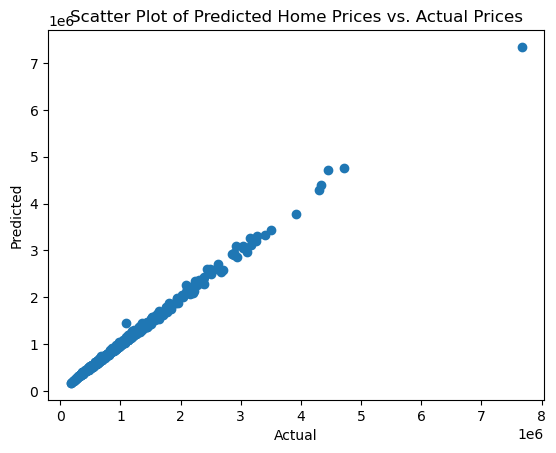

In [161]:
plt.scatter(y_test, predicted2023_02_28)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot of Predicted Home Prices vs. Actual Prices')

Text(0.5, 1.0, 'Regression Line Plot: Actual vs. Predicted Home Prices')

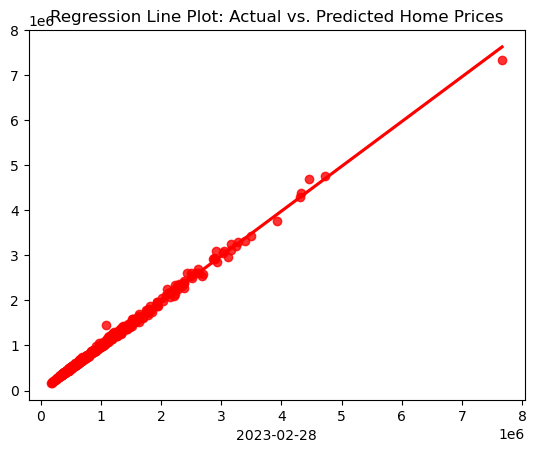

In [162]:
# Plot the regression line of the model

sns.regplot(x=y_test,y=predicted2023_02_28,ci=None,color ='red').set_title("Regression Line Plot: Actual vs. Predicted Home Prices")

## Compare the predicted values vs. the actual values

In [163]:
# Create a copy of the original data
home_sales_predicted = home_prediction_df.copy()


In [164]:
# Since the round function is not supported in a NumPy array
# create an empty list and loop through the results of the regression model prediction
# # Append the rounded values to an empty list
predicted_prices = []
for i in range(len(predicted2023_02_28)):
    rounded_value = round(predicted2023_02_28[i], 1)
    home_sales_predicted.loc[i, "2023_02_28_predicted"] = rounded_value
    predicted_prices.append(rounded_value)

print(predicted_prices)


[485855.6, 544624.8, 777134.7, 369665.4, 629471.1, 694523.9, 2072917.2, 533700.5, 785725.8, 857856.0, 476066.9, 2708212.7, 3263517.5, 355352.0, 1075758.3, 461668.2, 1002673.0, 569399.8, 354250.3, 598817.2, 903235.6, 1213389.5, 1369212.7, 725477.6, 1179097.8, 1246792.1, 801150.4, 375783.5, 1527606.4, 479549.7, 1224630.6, 339325.9, 1352729.3, 230914.5, 1973241.8, 484786.7, 473611.3, 725830.5, 1535324.5, 1183149.3, 1432762.2, 898379.8, 773984.1, 731094.9, 1228553.9, 605053.5, 370828.5, 810468.3, 1334159.4, 906360.2, 478082.4, 1584821.3, 305390.7, 604608.0, 406988.5, 3301294.8, 3054265.9, 684028.3, 988986.6, 350825.7, 593603.8, 1124021.8, 846900.1, 299778.8, 1291487.8, 1546018.8, 322464.8, 581837.8, 556759.8, 362302.9, 1006674.0, 637609.0, 1152195.0, 541700.6, 979059.0, 666695.8, 1280781.6, 408342.8, 364809.2, 2538937.7, 505168.5, 1002934.4, 386017.9, 336035.4, 737527.2, 2440876.2, 833871.1, 895377.6, 886132.0, 1477444.1, 669619.1, 1011493.7, 594955.0, 386002.8, 661126.3, 365725.0, 892103.

In [165]:
# Create a copy of the original data
home_sales_predicted = home_prediction_df.copy()


In [166]:
home_sales_predicted = home_sales_predicted.sample(n=519, random_state=1)


In [193]:
# Add a column with the predicted sales values
home_sales_predicted["predicted_home_prices"] = predicted_prices
# Display sample data
home_sales_predicted.head()


,County,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,predicted_home_prices
724,Riverside County,367766.0,368894.0,369412.0,369822.0,369390.0,369175.0,369550.0,370728.0,372309.0,...,512564.0,516233.0,517674.0,517252.0,516242.0,514627.0,512785.0,509384.0,505791.0,485855.6
348,Riverside County,426005.0,427480.5,429081.0,430174.0,430011.0,429703.0,430200.5,431204.0,432668.0,...,578438.0,580290.5,579341.0,577474.0,575855.0,574579.0,572518.5,568752.0,564757.5,544624.8
102,Los Angeles County,640159.5,633343.0,624419.5,617584.0,612900.0,609983.5,609615.5,612811.5,618130.5,...,820679.5,824847.5,823793.0,819691.5,816637.0,818030.0,820220.0,818691.0,810256.5,777134.7
1081,Riverside County,240319.0,240193.0,239121.5,238156.0,238045.0,238818.5,239982.5,241261.5,242506.0,...,370472.5,372529.5,372772.0,371429.5,370493.0,369286.0,367691.0,365438.5,363005.0,369665.4
1194,Sacramento County,503412.0,502305.0,502607.0,502977.5,502698.5,501282.5,501249.0,501666.0,502841.0,...,668912.0,670301.0,667682.5,662236.0,657361.0,653046.0,647852.0,644333.5,639427.0,629471.1


In [227]:
# Create a scatter plot with the actual home sales information
actual_sales_plot = home_sales_predicted.hvplot.scatter(
    x="County",
    y="2023-02-28",
    title="Actual vs Predicted Home Prices By County"
)
actual_sales_plot.opts(xrotation=90)


:Scatter   [County]   (2023-02-28)

In [195]:
# Compare the Predicted Values and the Actual Values, Noting Also the Differences
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': predicted_prices,'Difference': y_test-predicted_prices})
pred_df

,Actual Value,Predicted Value,Difference
724,505791.0,485855.6,19935.4
348,564757.5,544624.8,20132.7
102,810256.5,777134.7,33121.8
1081,363005.0,369665.4,-6660.4
1194,639427.0,629471.1,9955.9
...,...,...,...
305,637528.0,670002.3,-32474.3
146,1009413.0,974569.7,34843.3
1043,668128.5,656600.2,11528.3
1245,395908.0,394003.0,1905.0


In [196]:
# Create a scatter plot with the predicted home sales information
predicted_sales_plot = home_sales_predicted.hvplot.scatter(
    x="County",
    y="predicted_home_prices",
    color = "red",
    title="Predicted Home Prices By County"
)
predicted_sales_plot.opts(xrotation=90)


:Scatter   [County]   (predicted_home_prices)

In [228]:
# Superpose the actual home sales data and the predicted home sales data
title = "Actual vs Predicted Home Prices By County"
actual_sales_plot * predicted_sales_plot



:Overlay
   .Scatter.I  :Scatter   [County]   (2023-02-28)
   .Scatter.II :Scatter   [County]   (predicted_home_prices)

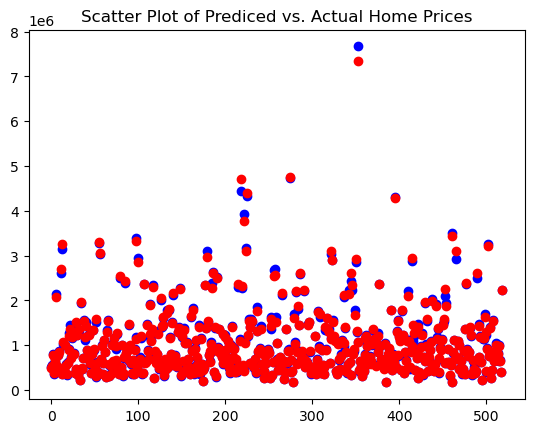

In [198]:
def plotGraph(y_test, predicted2023_02_28, regressorName):
    if max(y_test) >= max(predicted2023_02_28):
        my_range = int(max(y_test))
    else:
        my_range = int(max(predicted2023_02_28))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(predicted2023_02_28)),
                predicted2023_02_28, color='red')
    plt.title(regressorName)
    plt.show()
    return


plotGraph(y_test, predicted2023_02_28,"Scatter Plot of Prediced vs. Actual Home Prices")


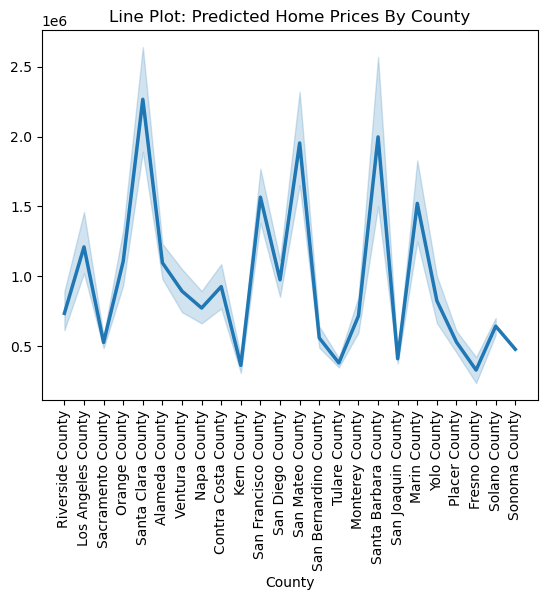

In [209]:
# Line Plot of Actual Home Prices By County
#setting the xticks parameter of the lineplot() function to be the range of the number of counties
# Then use set_xticklabels() to set the labels to the actual county names
ax1 = sns.lineplot(data=home_sales_predicted, x="County", linewidth=2.5, y=predicted2023_02_28)
ax1.set_title("Line Plot: Predicted Home Prices By County")
ax1.set_xticks(range(len(home_sales_predicted['County'].unique())))
ax1.set_xticklabels(home_sales_predicted['County'].unique(), rotation=90)
plt.show()


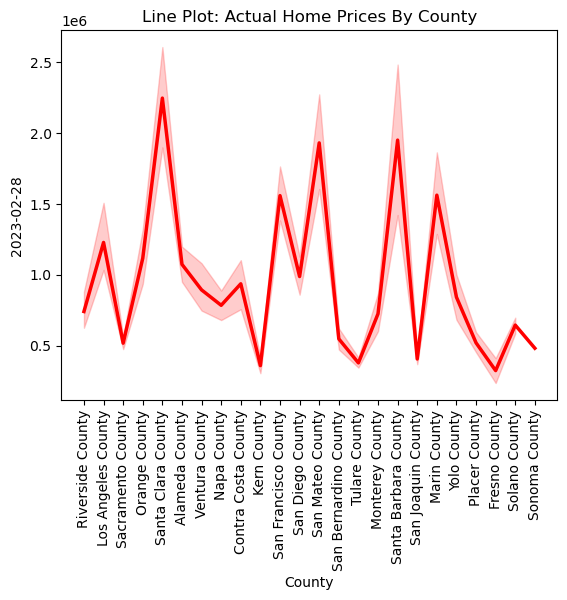

In [210]:
# Line Plot of Actual Home Prices By County
#setting the xticks parameter of the lineplot() function to be the range of the number of counties
# Then use set_xticklabels() to set the labels to the actual county names

ax = sns.lineplot(data=home_sales_predicted,color="red", linewidth=2.5,  x="County", y=y_test)
ax.set_title("Line Plot: Actual Home Prices By County")
ax.set_xticks(range(len(home_sales_predicted['County'].unique())))
ax.set_xticklabels(home_sales_predicted['County'].unique(), rotation=90)
plt.show()


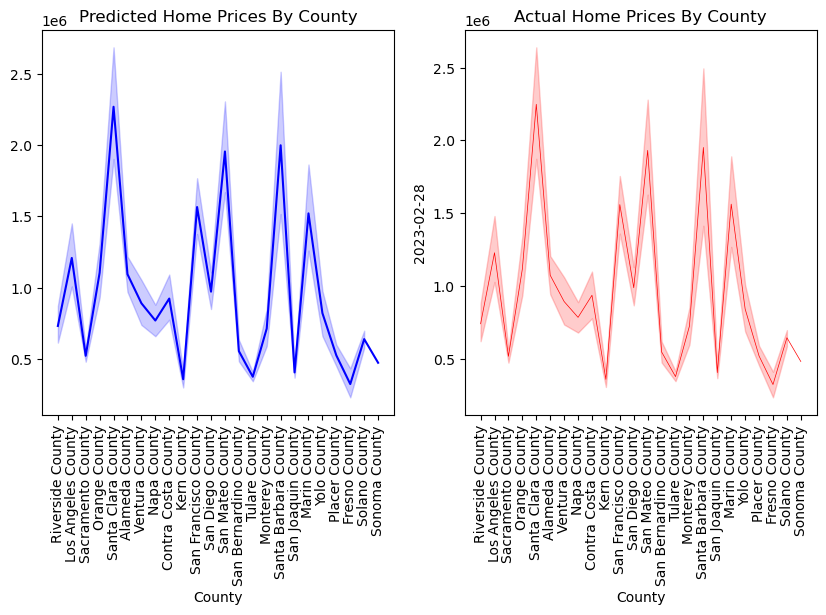

In [211]:
# Superpose the actual home sales data and the predicted home sales data

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the predicted home prices on the first subplot
sns.lineplot(data=home_sales_predicted, x="County",
             y=predicted2023_02_28, ax=ax1, color="blue")
ax1.set_title("Predicted Home Prices By County")
ax1.set_xticks(range(len(home_sales_predicted['County'].unique())))
ax1.set_xticklabels(home_sales_predicted['County'].unique(), rotation=90)

# Plot the actual home prices on the second subplot
sns.lineplot(data=home_sales_predicted, x="County",
             y=y_test, ax=ax2, color="red", linewidth=0.5)
ax2.set_title("Actual Home Prices By County")
ax2.set_xticks(range(len(home_sales_predicted['County'].unique())))
ax2.set_xticklabels(home_sales_predicted['County'].unique(), rotation=90)

# Show the plot
plt.show()


## Evaluate the Model

In [176]:
# Compute the metrics for the linear regression model
r2 = round(r2_score(y_test, predicted2023_02_28)*100,2)
Accuracy = r2_score(y_test, predicted2023_02_28)*100

mse = round(mean_squared_error(y_test, predicted2023_02_28),2)
rmse = round(np.sqrt(mse),2)
std = round(np.std(y_test),2)

# Print releveant metrics.
print(" The score of the model is %.2f" % Accuracy)
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


 The score of the model is 99.71
The r2 is 99.71.
The mean squared error is 1743581026.15.
The root mean squared error is 41756.21.
The standard deviation is 770996.78.


#### The above metrics reflect that the model is a good model since the standard deviation is greater than the root mean squared error
#### And the regression coefficient of approximately 99.71%  expresses the high explanatory power of the model in forecasting home prices